In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
abalone = pd.read_csv("dataset_to_use.csv")

In [3]:
abalone.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_0,sex_1,sex_2,type
0,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,0.0,0.0,1.0,3
1,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,0.0,1.0,0.0,1
2,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,0.0,1.0,0.0,1
3,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,0.0,0.0,1.0,3
4,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,0.0,1.0,0.0,1


In [4]:
X,Y = abalone[abalone.columns[:-1]],abalone[abalone.columns[-1]]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, stratify = Y, random_state=66, test_size=0.33)

In [5]:
TrainAcc = []
TestAcc = []

In [6]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(Xtrain,Ytrain)
TrainAcc.append(tree.score(Xtrain,Ytrain))
TestAcc.append(tree.score(Xtest,Ytest))

In [7]:
TrainAcc,TestAcc

([0.6801715919923736], [0.6286266924564797])

In [8]:
export_graphviz(tree, out_file="tree.dot", class_names=['0','1','2'], feature_names=list(abalone.columns[:-1]), impurity=False, filled=True)

<BarContainer object of 10 artists>

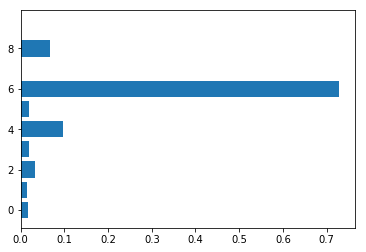

In [9]:
n_features = abalone[abalone.columns[:-1]].shape[1]
plt.barh(range(n_features),tree.feature_importances_)